In [ ]:
from datetime import datetime
from fastapi import FastAPI
from pymongo import MongoClient
import os
from dotenv import load_dotenv
from inital import update_datas
from fastapi.middleware.cors import CORSMiddleware
from fastapi import FastAPI, BackgroundTasks, HTTPException
from pymongo import MongoClient
import asyncio
import pytz




# Carregar variáveis de ambiente
load_dotenv()
MONGO_URI = os.getenv("MONGO_URI")

# Conectar ao MongoDB
client = MongoClient(MONGO_URI)
db = client["duolingo"]
db_jogadores = db["jogadores"]
db_evolucao = db["evolucao_diaria"]

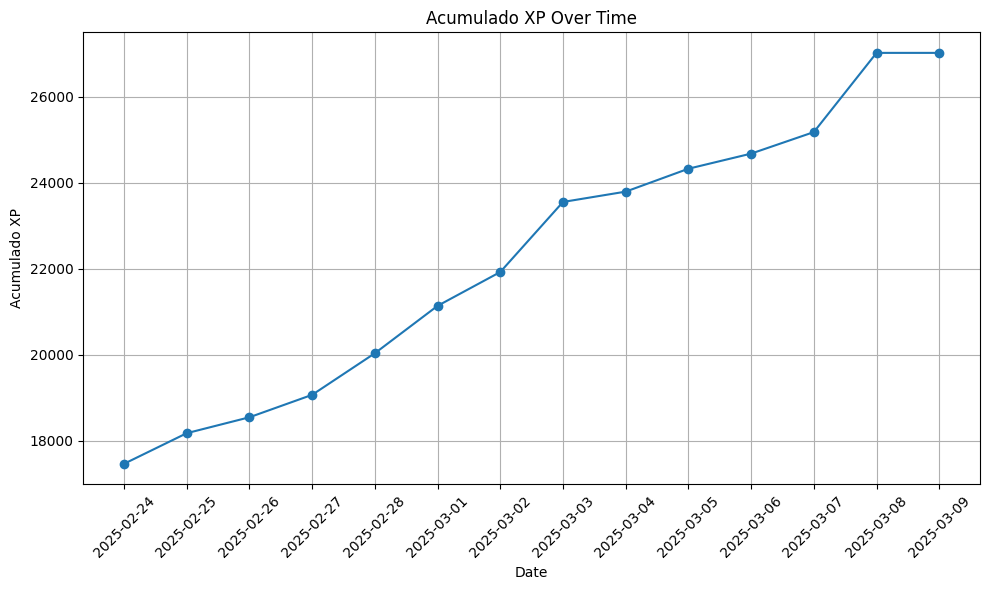

In [21]:
from bson import ObjectId
import json
import matplotlib.pyplot as plt

# Fetch data from the database
datas = list(db_evolucao.find({"username": "Tamura"}))

# Custom JSON encoder for ObjectId
class CustomEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, ObjectId):
            return str(obj)
        return json.JSONEncoder.default(self, obj)


# Extract dates and acumuladoXp values
dates = [entry['date'] for entry in datas]
acumulado_xp = [entry['xpDay'] for entry in datas]

# Plot the data
plt.figure(figsize=(10,6))
plt.plot(dates, acumulado_xp, marker='o')
plt.xlabel('Date')
plt.ylabel('Acumulado XP')
plt.title('Acumulado XP Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()